# Clustering KMeans

### Explorar un dataset de países y detectar similitudes utilizando clustering

In [1]:
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

## Carga de datos

In [2]:
# Definir la ruta donde se encuentra la carpeta y los CSVs que iremos trabajar
ruta_datos_preprocesados = '../data/ficheros_procesados/datos_preprocesados_limpios.csv'

# Especifica los nombres de las columnas que deseas importar
columnas_deseadas = ['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Social support', \
                    'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

# Crea el DataFrame solamente las columnas especificadas
df = pd.read_csv(ruta_datos_preprocesados, delimiter=",", engine="python", usecols=columnas_deseadas)
df.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
1,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
2,Finland,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
3,Sweden,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
4,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171


In [3]:
df.columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)',
       'Social support', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [4]:
df.shape

(33, 8)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,33.0,7.491818,0.096358,7.29100,7.494000,7.496500,7.526000,7.76900
Economy (GDP per Capita),33.0,1.423494,0.066175,1.29025,1.380000,1.448905,1.448905,1.57744
Social support,33.0,1.343863,0.169703,1.06200,1.289070,1.325475,1.487000,1.64400
Health (Life Expectancy),33.0,0.856456,0.068475,0.76300,0.828605,0.828605,0.885210,1.02600
Freedom,33.0,0.647670,0.038522,0.57104,0.641690,0.659400,0.669730,0.70300
Trust (Government Corruption),33.0,0.379508,0.082301,0.11800,0.393000,0.393000,0.410000,0.48500
Generosity,33.0,0.274262,0.055591,0.15300,0.246500,0.246500,0.293000,0.38254


## EDAs

<Axes: xlabel='Happiness Score', ylabel='Count'>

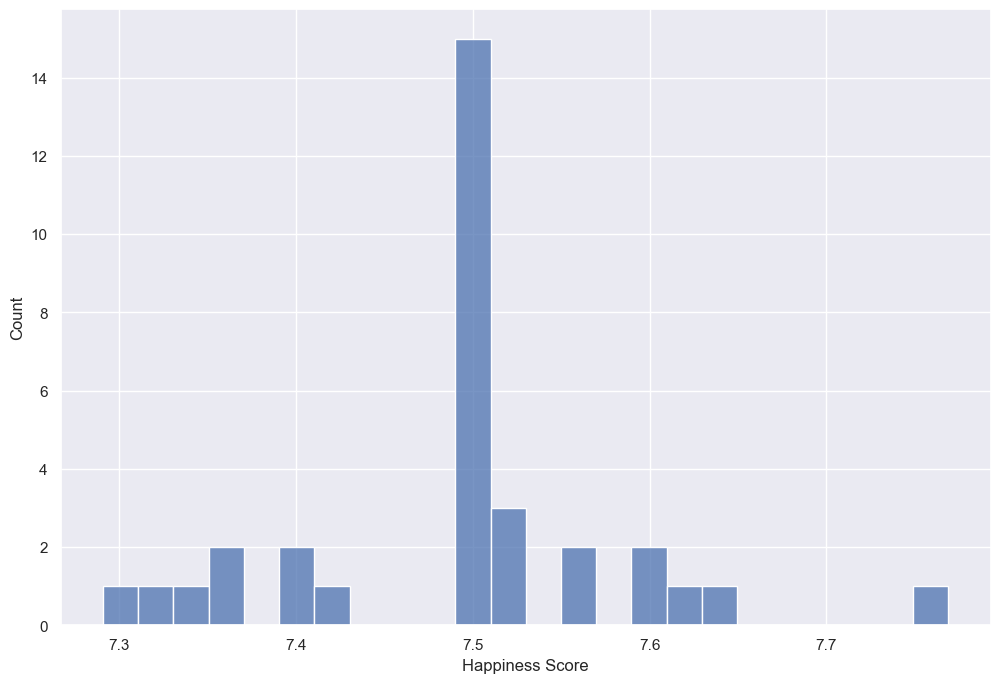

In [6]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Happiness Score')

<Axes: xlabel='Happiness Score', ylabel='Count'>

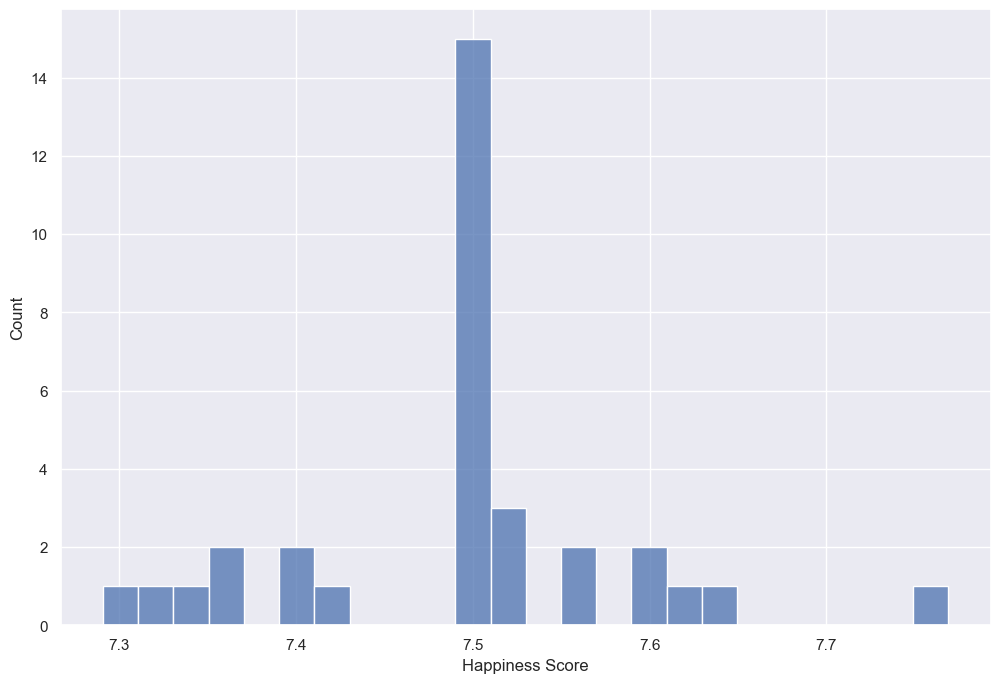

In [7]:
plt.figure(figsize=(12,8))
filter = df['Happiness Score'] < 1000000000
sns.histplot(data=df[filter], x='Happiness Score')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Norway'),
  Text(1, 0, 'Denmark'),
  Text(2, 0, 'Iceland'),
  Text(3, 0, 'Sweden'),
  Text(4, 0, 'Finland'),
  Text(5, 0, 'Spain')])

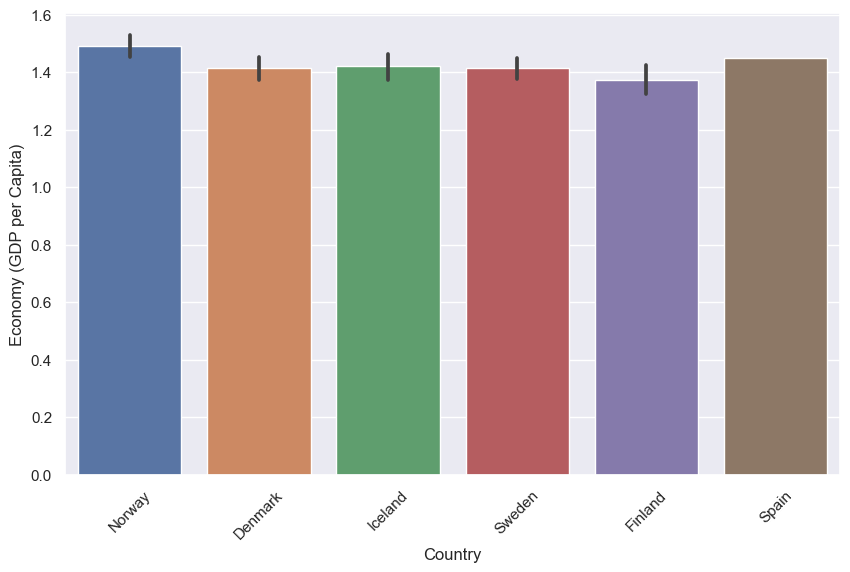

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values('Economy (GDP per Capita)', ascending=False), x='Country', y='Economy (GDP per Capita)')
plt.xticks(rotation=45)


<Axes: xlabel='Economy (GDP per Capita)', ylabel='Social support'>

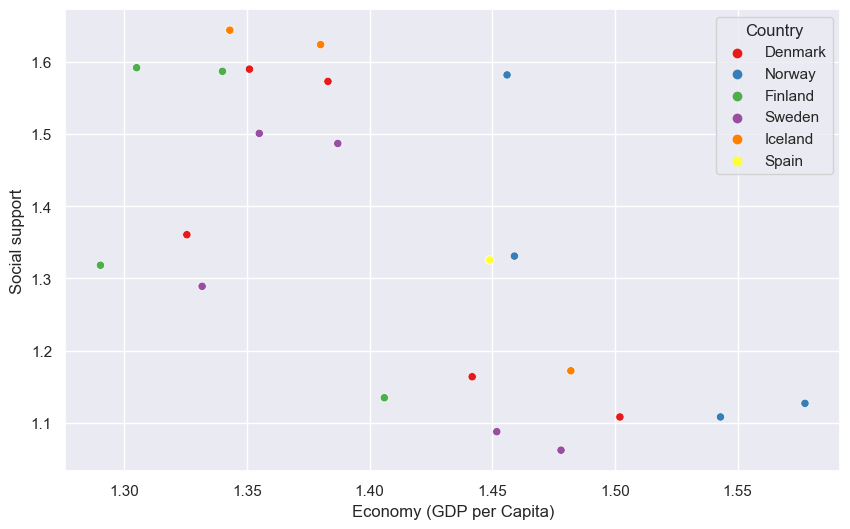

In [9]:
# PIB PER CAPITA X APOYO SOCIAL
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Economy (GDP per Capita)', y ='Social support', hue='Country', palette='Set1')


<Axes: xlabel='Economy (GDP per Capita)', ylabel='Health (Life Expectancy)'>

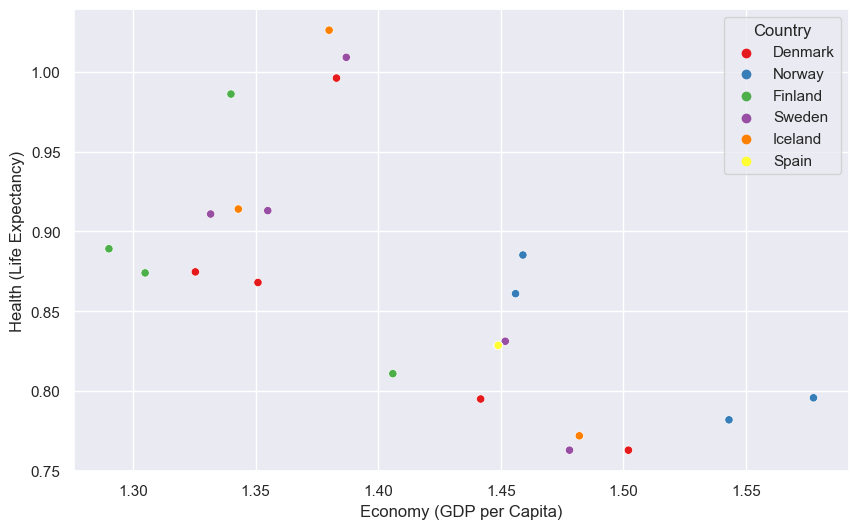

In [10]:
# PIB PER CAPITA X ESPERANZA DE VIDA
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Economy (GDP per Capita)', y ='Health (Life Expectancy)', hue='Country', palette='Set1')


<Axes: xlabel='Economy (GDP per Capita)', ylabel='Freedom'>

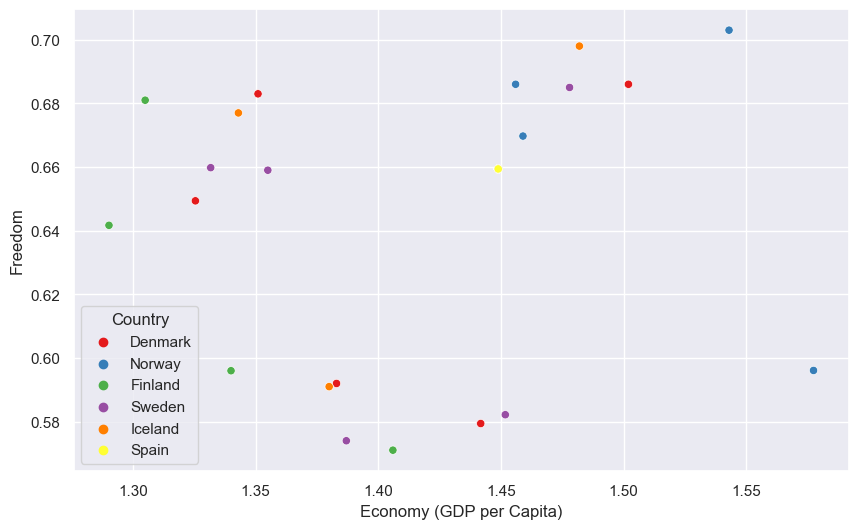

In [11]:
# PIB PER CAPITA X LIBERTAD
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Economy (GDP per Capita)', y ='Freedom', hue='Country', palette='Set1')

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Trust (Government Corruption)'>

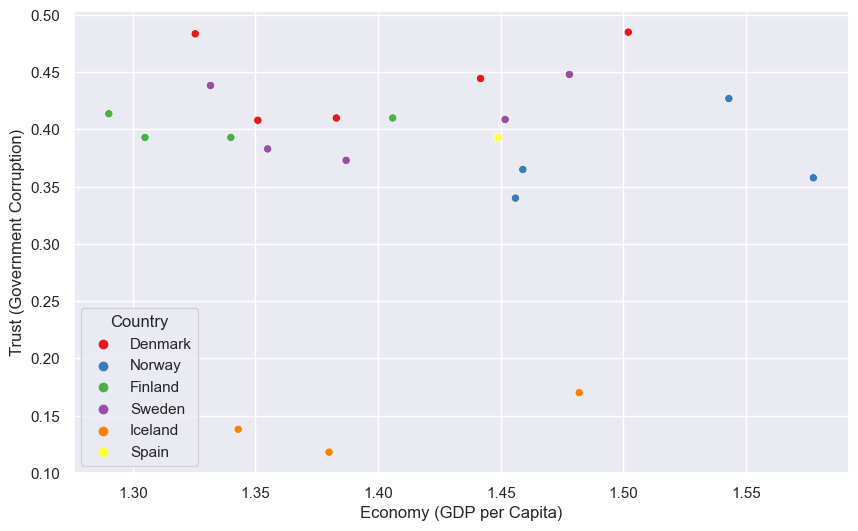

In [12]:
# PIB PER CAPITA X PERCEPCION DE LA CORRUPCIÓN
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Economy (GDP per Capita)', y ='Trust (Government Corruption)', hue='Country', palette='Set1')


<Axes: xlabel='Economy (GDP per Capita)', ylabel='Generosity'>

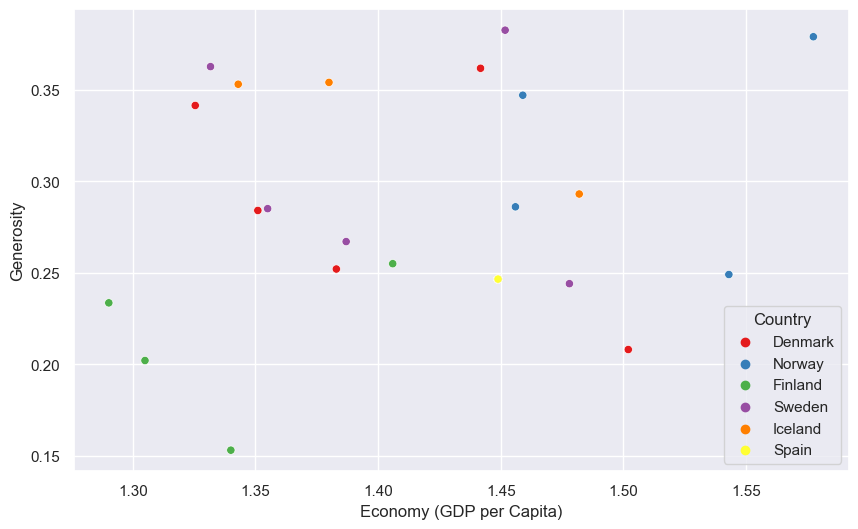

In [13]:
# PIB PER CAPITA X GENEROSIDAD
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Economy (GDP per Capita)', y ='Generosity', hue='Country', palette='Set1')


C:\Users\Erika\AppData\Local\Temp\ipykernel_24168\4089422600.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), cmap='viridis', annot=True, vmin=-1.0, vmax=1.0);


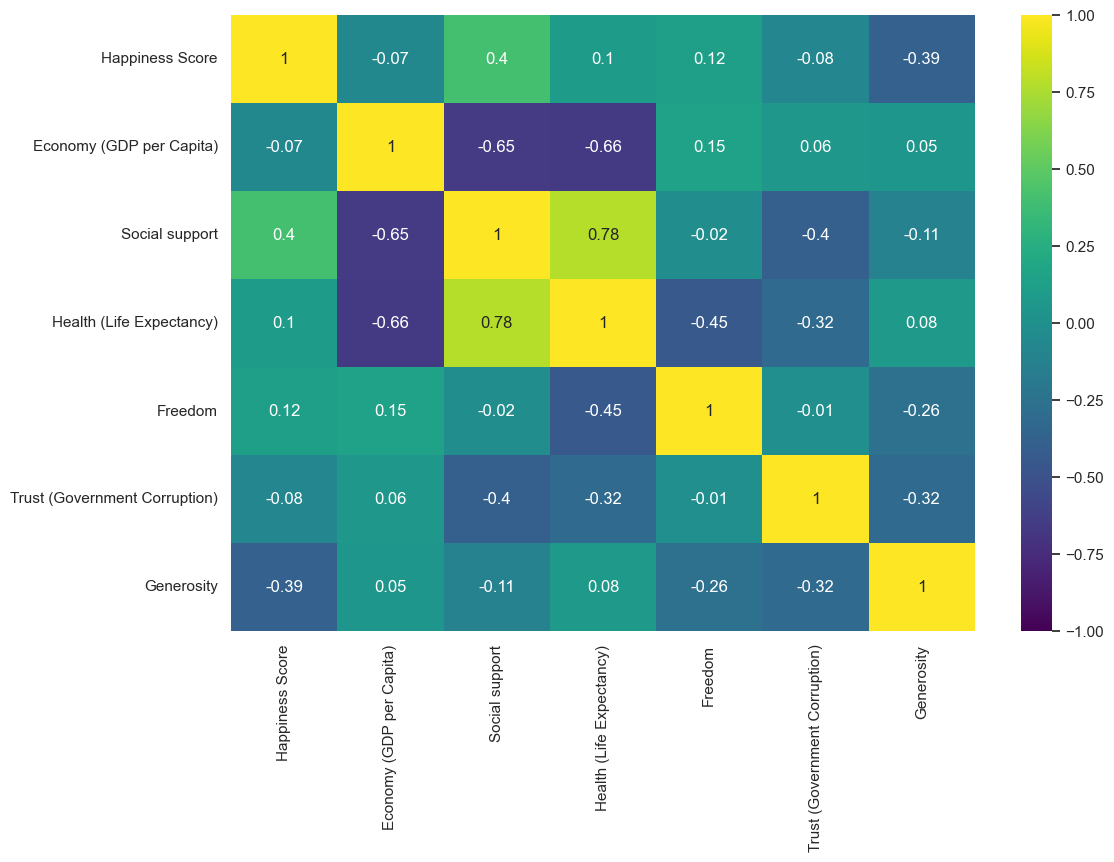

In [14]:
# Mapa de Calor (correlacción), buscan los valores entre -1 y +1 que son mas cercanos
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True, vmin=-1.0, vmax=1.0);

C:\Users\Erika\AppData\Local\Temp\ipykernel_24168\3588913153.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr().round(2), cmap='viridis', annot=True);


<Figure size 4000x3000 with 0 Axes>

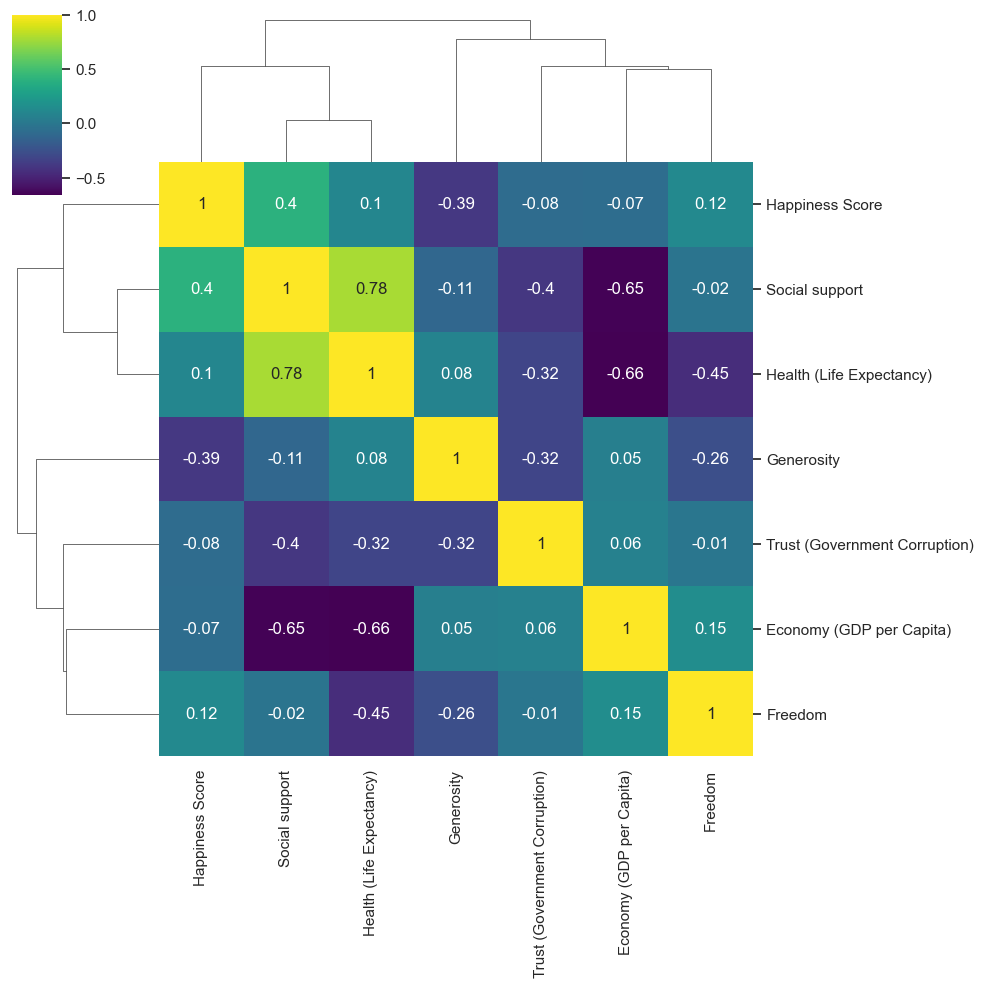

In [15]:
"""
El método clustermap() utiliza agrupación jerárquica para ordenar los datos por similitud, 
sin necesidad de especificar un número concreto de clústers. 
Reorganiza los datos de las filas y columnas y muestra el contenido similar uno al lado de otro para 
una comprensión más profunda.
"""
plt.figure(figsize=(20,15), dpi=200)
sns.clustermap(df.corr().round(2), cmap='viridis', annot=True);

In [16]:
df.corr(method='pearson')

C:\Users\Erika\AppData\Local\Temp\ipykernel_24168\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,-0.068096,0.395433,0.099766,0.117807,-0.078924,-0.391047
Economy (GDP per Capita),-0.068096,1.000000,-0.648603,-0.661572,0.148279,0.060251,0.052592
Social support,0.395433,-0.648603,1.000000,0.780363,-0.016164,-0.403407,-0.110833
Health (Life Expectancy),0.099766,-0.661572,0.780363,1.000000,-0.445202,-0.323021,0.077532
Freedom,0.117807,0.148279,-0.016164,-0.445202,1.000000,-0.008004,-0.257378
Trust (Government Corruption),-0.078924,0.060251,-0.403407,-0.323021,-0.008004,1.000000,-0.315698
Generosity,-0.391047,0.052592,-0.110833,0.077532,-0.257378,-0.315698,1.000000


## Data preparation

### Valores faltantes

In [17]:
df.isnull().sum()

Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

## Obtención X

In [18]:
X = pd.get_dummies(df.drop('Country', axis=1))
X

,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.5270,1.325480,1.360580,0.874640,0.64938,0.48357,0.34139
1,7.5220,1.459000,1.330950,0.885210,0.66973,0.36503,0.34699
2,7.4060,1.290250,1.318260,0.889110,0.64169,0.41372,0.23351
3,7.3640,1.331710,1.289070,0.910870,0.65980,0.43844,0.36262
4,7.5260,1.441780,1.163740,0.795040,0.57941,0.44453,0.36171
5,7.4980,1.577440,1.126900,0.795790,0.59609,0.35776,0.37895
6,7.4130,1.405980,1.134640,0.810910,0.57104,0.41004,0.25492
7,7.2910,1.451810,1.087640,0.831210,0.58218,0.40867,0.38254
8,7.4965,1.448905,1.325475,0.828605,0.65940,0.39300,0.24650
9,7.4965,1.448905,1.325475,0.828605,0.65940,0.39300,0.24650


## Escalado

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Clustering: Kmeans

1. Método del codo
2. Coeficientes de siluetas

c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

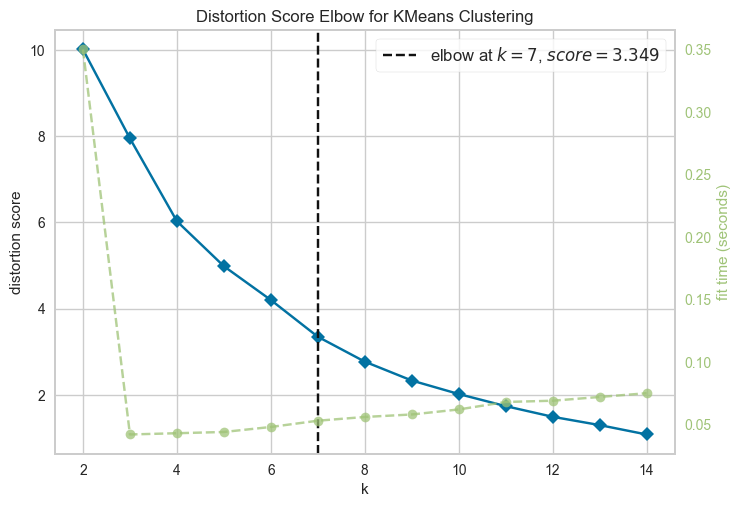

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(2, 15))
visualizer.fit(X_scaled)
visualizer.show()

c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

<Axes: >

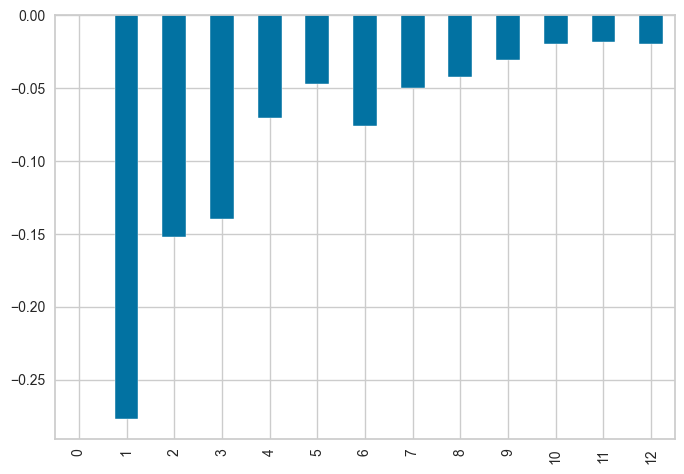

In [21]:
wcss = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

pd.Series(wcss).diff().plot(kind='bar')

c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


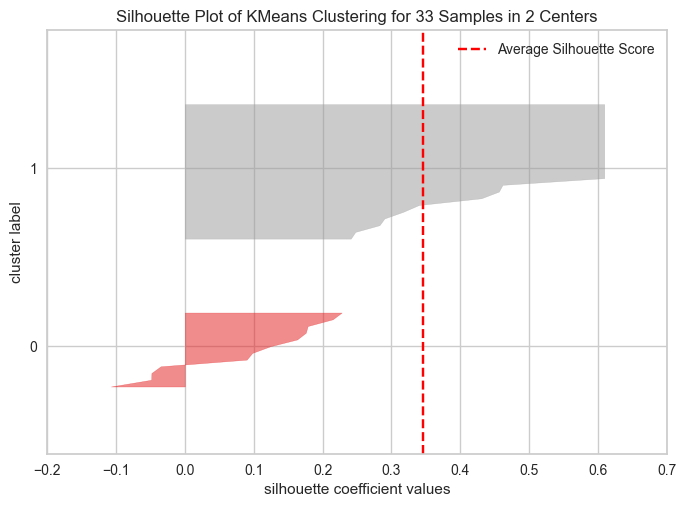

c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


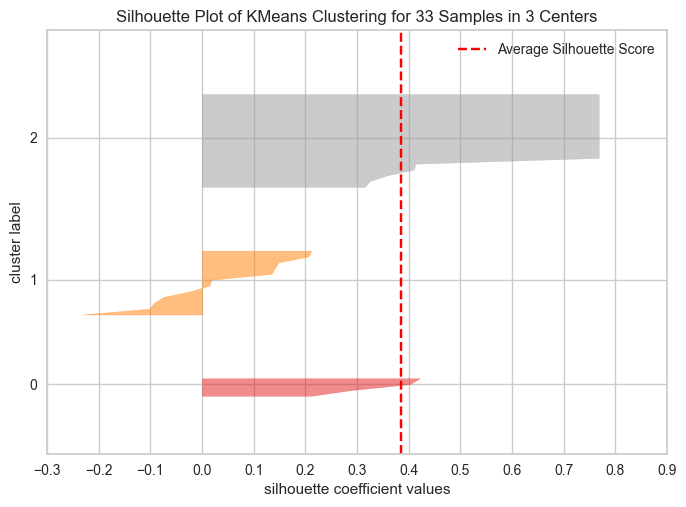

c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


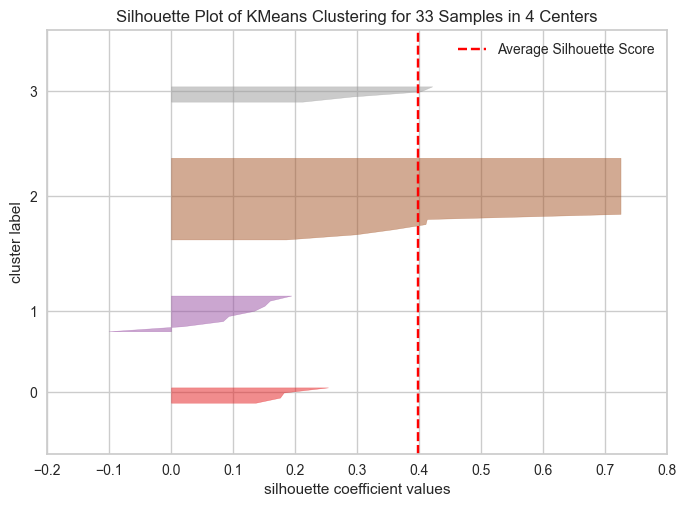

c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


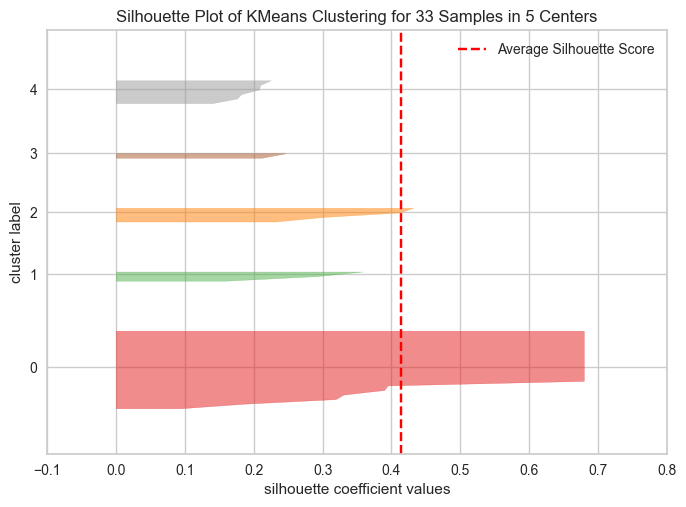

c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


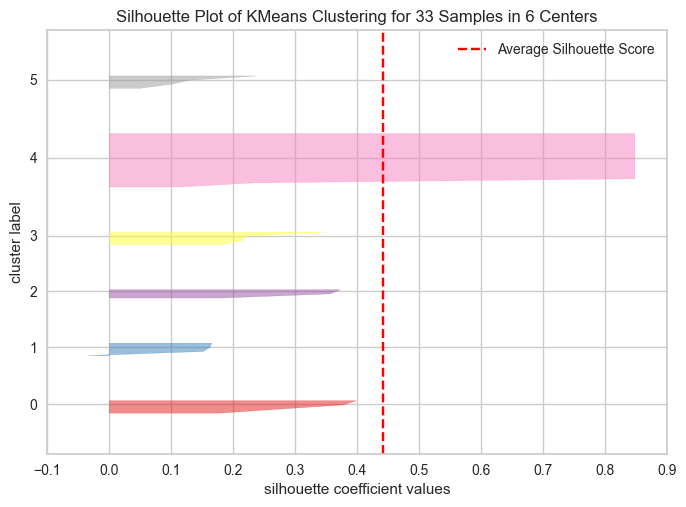

c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


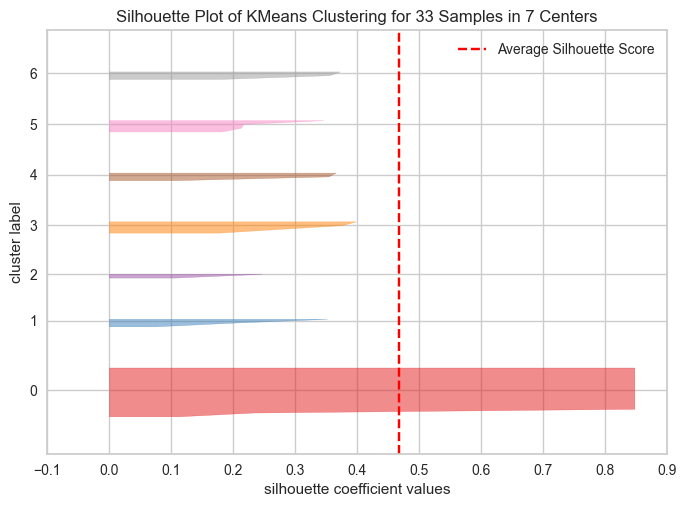

c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


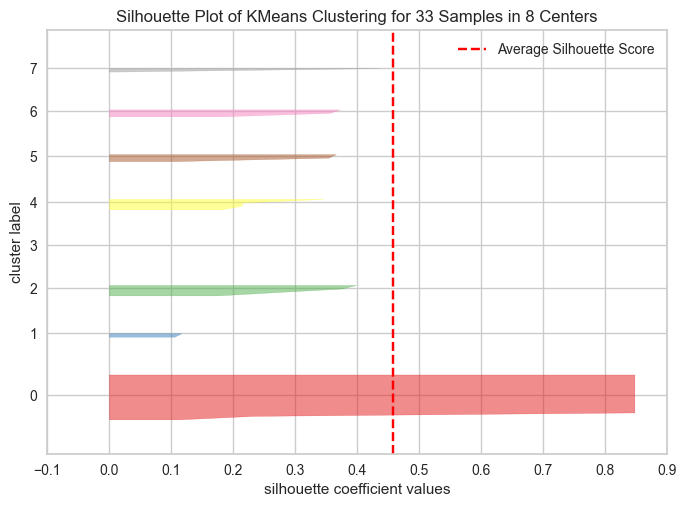

c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


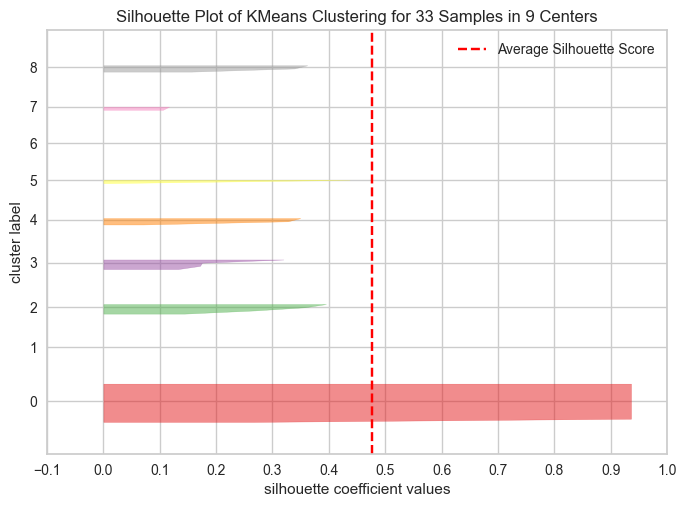

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,10):
    visualizer = SilhouetteVisualizer(KMeans(n_clusters=i), color='sns_bright')
    visualizer.fit(X_scaled)
    # visualizer.fit(X)
    visualizer.show()

In [23]:
model = KMeans(3)
model.fit(X_scaled)
X_cluster = X.copy()
X_cluster['cluster'] = model.labels_

c:\Users\Erika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
X_cluster.head()

,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,cluster
0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
1,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2
2,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,0
3,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,0
4,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,1


In [25]:
X_cluster.corr()['cluster'].sort_values()

Health (Life Expectancy)        -0.726458
Social support                  -0.623433
Generosity                      -0.266773
Happiness Score                 -0.049397
Trust (Government Corruption)    0.170464
Freedom                          0.368119
Economy (GDP per Capita)         0.746934
cluster                          1.000000
Name: cluster, dtype: float64

<Axes: >

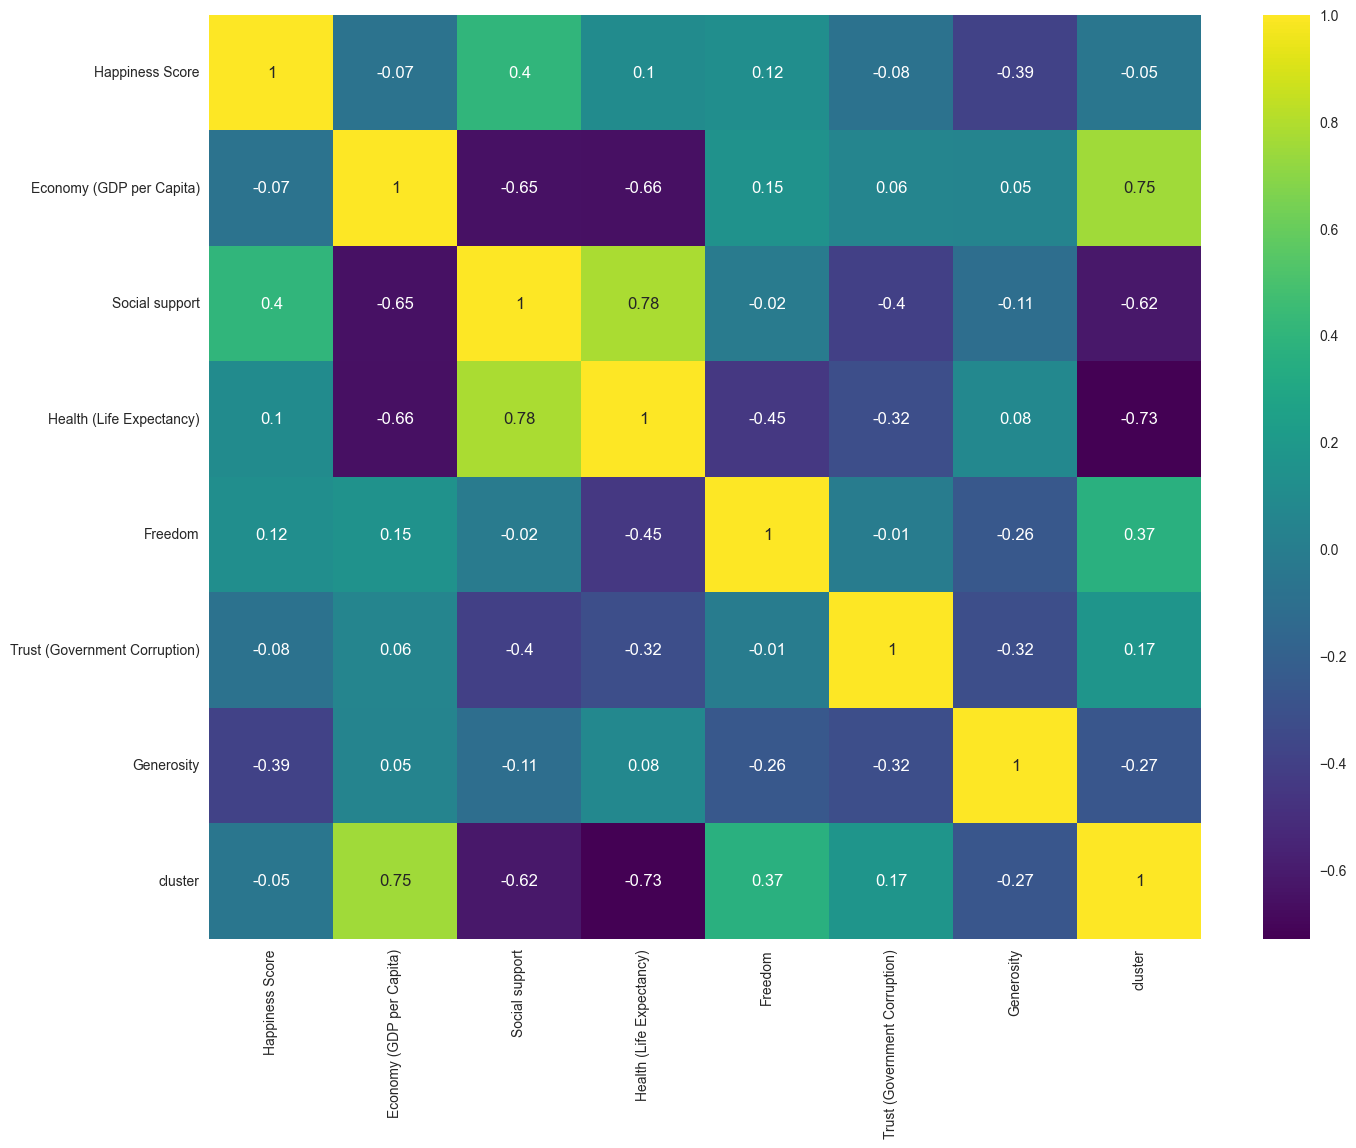

In [26]:
plt.figure(figsize=(16,12), dpi=100)
sns.heatmap(X_cluster.corr().round(2), cmap='viridis', annot=True)

<Axes: xlabel='cluster', ylabel='count'>

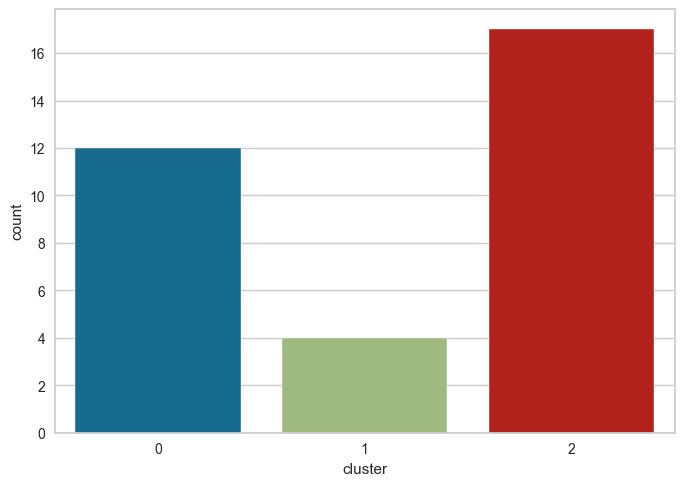

In [27]:
sns.countplot(data=X_cluster, x='cluster')

In [28]:
import plotly.express as px
px.histogram(X_cluster, x='cluster', color='cluster')

## Visualización resultados

Buscar códigos ISO de países para utilizarlos en la visualización de los clusters sobre un mapa del mundo

Alternativa dataset: https://www.kaggle.com/datasets/juanumusic/countries-iso-codes

In [29]:
df_iso = pd.read_csv("../data/countries_iso.csv")
df_iso.head(20)

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
5,American Samoa,ASM
6,Andorra,AND
7,Angola,AGO
8,Anguilla,AIA
9,Antarctica [a],ATA


In [30]:
df_iso.shape

(301, 2)

In [31]:
iso_codes = df_iso.set_index('Country')['ISO Code'].to_dict()
iso_codes

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [32]:
df.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
1,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
2,Finland,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
3,Sweden,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
4,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171


In [33]:
df.shape

(33, 8)

In [34]:
# Mapeo/transformación de País (texto) a ISO Code (texto)
df['iso'] = df['Country'].map(iso_codes)

In [35]:
df['cluster'] = X_cluster['cluster']

In [36]:
df.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,iso,cluster
0,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,DNK,0
1,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,NOR,2
2,Finland,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,FIN,0
3,Sweden,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,SWE,0
4,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,DNK,1


In [37]:
px.choropleth(df, locations='iso', color='cluster', hover_name='Country')